In [2]:
import pandas as pd
from pandasql import sqldf
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\sidhu\Downloads\Data Analyst Assignment - Dashboard.csv")
print(df.head())

  Document Date (MR) Document Number (MR) Recipient Billing Name (OP)  \
0         11/29/2024       FLYH24/11/0221  Suraj Bhan Hari Chand Jain   
1         11/29/2024        SINV-24-01776                  Dharmender   
2         11/29/2024        SINV-24-01778                    Abhishek   
3         11/29/2024        SINV-24-01779                   Deepanshu   
4         11/29/2024        SINV-24-01786                    Abhinabh   

  Recipient Billing GSTIN (MR)  GSTIN (Valid/Invalid) GSTIN Type GSTIN Status  \
0              07AAIPJ3104A1ZH                    NaN    Unknown      Unknown   
1                          NaN                    NaN        NaN          NaN   
2                          NaN                    NaN        NaN          NaN   
3                          NaN                    NaN        NaN          NaN   
4                          NaN                    NaN        NaN          NaN   

  Place of Supply  (Need to be discussed as the same will be reported on t

C:\Users\sidhu\AppData\Local\Temp\ipykernel_8028\1393222952.py:6: DtypeWarning: Columns (2,3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\sidhu\Downloads\Data Analyst Assignment - Dashboard.csv")


In [3]:
query = "SELECT `Document Number (MR)`,`Document Date (MR)`,`HSN or SAC code (MR)`,count(*) FROM df group by 1,2,3 order by 4 desc limit 10"
result = sqldf(query, locals())

print(result)

  Document Number (MR) Document Date (MR)  HSN or SAC code (MR)  count(*)
0        E24/11/027365          11/6/2024            20081990.0        60
1        E24/11/054556         11/16/2024             8135020.0        60
2        E24/11/089834         11/21/2024            20081920.0        60
3      ECN24/11/023270         11/21/2024            20081920.0        60
4        E24/11/027167          11/6/2024            20081990.0        50
5      ECN24/11/003388          11/8/2024             8135020.0        50
6        E24/11/038045         11/11/2024            20060000.0        36
7        E24/11/045501         11/14/2024            12079990.0        25
8        E24/11/039965         11/12/2024            12079990.0        20
9        E24/11/082968         11/20/2024             8062010.0        20


In [4]:
query = "select distinct * from df where `Document Number (MR)`='E24/11/027365' and `Document Date (MR)`='11/6/2024' and `HSN or SAC code (MR)`=20081990.0 "
result = sqldf(query, locals())

print(result)

  Document Date (MR) Document Number (MR) Recipient Billing Name (OP)  \
0          11/6/2024        E24/11/027365                        None   

  Recipient Billing GSTIN (MR) GSTIN (Valid/Invalid) GSTIN Type GSTIN Status  \
0                         None                  None       None         None   

  Place of Supply  (Need to be discussed as the same will be reported on the basis of HSN/SAC directory)  \
0                                     27-Maharashtra                                                       

  Is the item a GOOD (G) or SERVICE (S) (OP) Item Description (OP)  ...  \
0                                       None                  None  ...   

   Item Unit of Measurement (MR)  Item Taxable Value (MR) GST Rate (MR)  \
0                            KGS                   282.21          None   

   CGST Rate (OP) CGST Amount  SGST Rate (OP)  SGST Amount  IGST Rate (OP)  \
0             0.0         0.0             0.0          0.0            12.0   

   IGST Amount  

In [5]:
# As we can see primary key for this table is supposed to be the combination of Document Number(MR), Document Date (MR),HSN or SAC code (MR) (ASSUMPTION)

In [6]:
# GSTIN (Valid/Invalid),GSTIN Type,	GSTIN Status, Is the item a GOOD (G) or SERVICE (S) (OP),Item Description (OP), As we can see given columns 
# have null or redundant values so we can drop them and proceed

In [7]:
columns_to_drop = [
    "GSTIN (Valid/Invalid)", 
    "GSTIN Type", 
    "GSTIN Status", 
    "Is the item a GOOD (G) or SERVICE (S) (OP)", 
    "Item Description (OP)"
]

# Drop columns
df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

# Display remaining columns
print(df.columns)

Index(['Document Date (MR)', 'Document Number (MR)',
       'Recipient Billing Name (OP)', 'Recipient Billing GSTIN (MR)',
       'Place of Supply  (Need to be discussed as the same will be reported on the basis of HSN/SAC directory)',
       'HSN or SAC code (MR)', 'Quantity (MR)',
       'Item Unit of Measurement (MR)', 'Item Taxable Value (MR)',
       'GST Rate (MR)', 'CGST Rate (OP)', 'CGST Amount', 'SGST Rate (OP)',
       'SGST Amount', 'IGST Rate (OP)', 'IGST Amount', 'MYGSTIN'],
      dtype='object')


In [8]:
def parse_date(date_str):
    try:
        return parser.parse(date_str).strftime("%Y-%m-%d")  # Standardize to "YYYY-MM-DD"
    except Exception:
        return None  # Return None for invalid dates

# Convert 'Document Date (MR)' to standardized format
df["Document Date (MR)"] = df["Document Date (MR)"].astype(str).apply(parse_date)

# Drop rows where date conversion failed (Optional)
df.dropna(subset=["Document Date (MR)"], inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [9]:
df.to_csv("cleaned_data.csv", index=False)

print("Date format standardized and duplicates removed successfully!")

Date format standardized and duplicates removed successfully!


In [10]:
query = "select `Place of Supply  (Need to be discussed as the same will be reported on the basis of HSN/SAC directory)` state, sum(`CGST Amount`+`SGST Amount`+`IGST Amount`) total_gst  from df group by 1 order by 2 desc limit 1"
result = sqldf(query, locals())
# Maximum GST Collection
print(result)

        state     total_gst
0  06-Haryana  5.117614e+06


In [11]:
query = "select `Place of Supply  (Need to be discussed as the same will be reported on the basis of HSN/SAC directory)` state, sum(`CGST Amount`+`SGST Amount`+`IGST Amount`) total_gst  from df group by 1 order by 2 limit 1"
result = sqldf(query, locals())
# Minimum GST Collection
print(result)

                state  total_gst
0  96-Other Countries        0.0


In [12]:
query = "select strftime('%Y-%m', [Document Date (MR)]) AS YM, sum(`CGST Amount`+`SGST Amount`+`IGST Amount`) total_gst  from df group by 1 order by 1 desc"
result = sqldf(query, locals())

print(result)

         YM     total_gst
0   2024-12  7.461800e+02
1   2024-11  2.887825e+07
2   2024-10 -6.485580e+03
3   2024-09  7.714000e+02
4   2024-08  1.176610e+03
5   2024-07  1.192180e+03
6   2024-06  5.974700e+02
7   2024-05  9.131700e+02
8   2024-04  3.604200e+02
9   2024-03  4.693300e+02
10  2024-02  4.773000e+02
11  2024-01  1.439840e+03


In [13]:
query = "select `Recipient Billing Name (OP)`, sum(`CGST Amount`+`SGST Amount`+`IGST Amount`) total_gst  from df group by 1 order by 2 desc limit 5"
result = sqldf(query, locals())
# top 5 insdustries in GST Contibution
print(result)

               Recipient Billing Name (OP)     total_gst
0           Flipkart India Private Limited  5.033854e+06
1    Connedit Business Solutions Pvt. Ltd.  4.435631e+06
2         Zomato Hyperpure Private Limited  3.966450e+06
3  KIRANAKART TECHNOLOGIES PRIVATE LIMITED  2.011196e+06
4                                     None  1.948966e+06


In [14]:
query = "select `Recipient Billing Name (OP)`, sum(`CGST Amount`+`SGST Amount`+`IGST Amount`) total_gst  from df group by 1 order by 2 limit 5"
result = sqldf(query, locals())
# bottom 5 insdustries in GST Contibution
print(result)

            Recipient Billing Name (OP)  total_gst
0       HANDS ON TRADES PRIVATE LIMITED  -86344.07
1     Herbaceous Retail Private Limited  -49779.81
2     CPC-Master Canteen Gc CRPF Nagpur  -22781.76
3                     Om Tanish Traders  -16100.59
4  CPC - Kendriya Police Master Bhandar  -13014.12


C:\Users\sidhu\AppData\Local\Temp\ipykernel_8028\706796086.py:5: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_data.csv")
C:\Users\sidhu\AppData\Local\Temp\ipykernel_8028\706796086.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total GST", y="Place of Supply  (Need to be discussed as the same will be reported on the basis of HSN/SAC directory)", data=state_gst, palette="coolwarm")


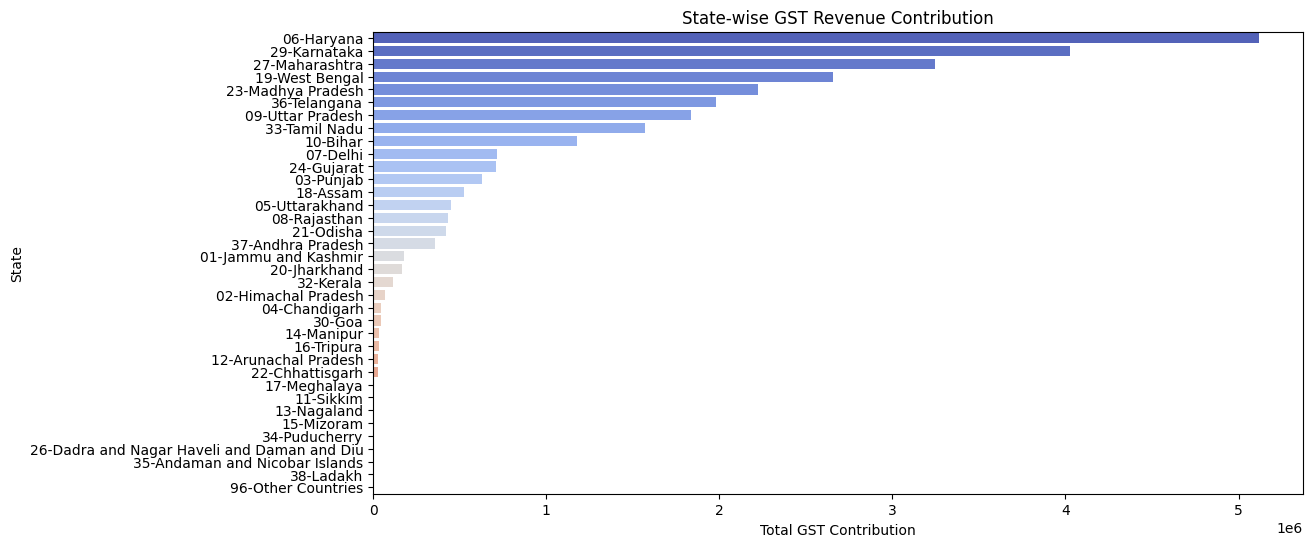

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("cleaned_data.csv")

# Standardize column names (remove spaces)
df.columns = df.columns.str.strip()

# Ensure 'Document Date (MR)' is in datetime format
df["Document Date (MR)"] = pd.to_datetime(df["Document Date (MR)"], errors="coerce")

# Compute total GST per row (CGST + SGST + IGST)
df["Total GST"] = df["CGST Amount"] + df["SGST Amount"] + df["IGST Amount"]

# ---------- 📊 State-wise GST Contribution (Bar Chart) ----------
state_gst = df.groupby("Place of Supply  (Need to be discussed as the same will be reported on the basis of HSN/SAC directory)")["Total GST"].sum().reset_index()
state_gst = state_gst.sort_values(by="Total GST", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Total GST", y="Place of Supply  (Need to be discussed as the same will be reported on the basis of HSN/SAC directory)", data=state_gst, palette="coolwarm")
plt.xlabel("Total GST Contribution")
plt.ylabel("State")
plt.title("State-wise GST Revenue Contribution")
plt.show()


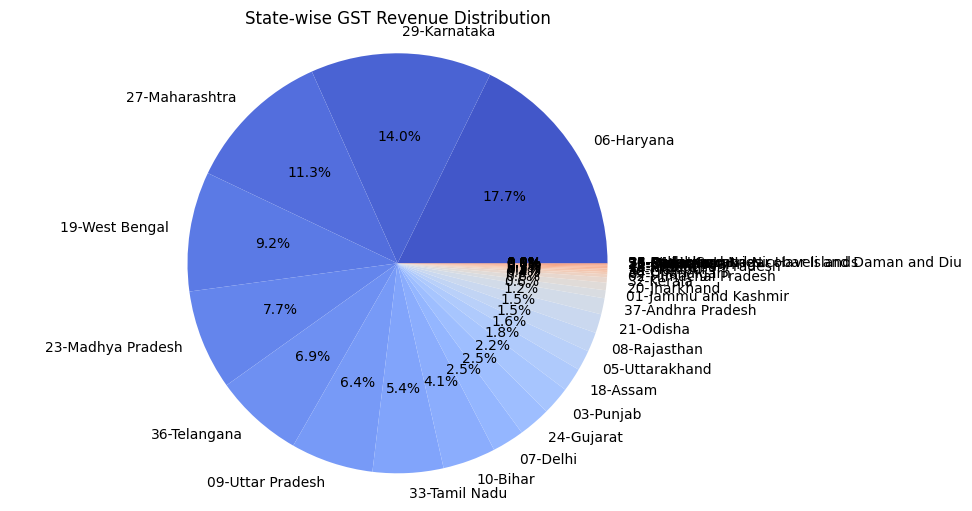

In [16]:

# ---------- 📊 State-wise GST Contribution (Pie Chart) ----------
plt.figure(figsize=(10, 6))
plt.pie(state_gst["Total GST"], labels=state_gst["Place of Supply  (Need to be discussed as the same will be reported on the basis of HSN/SAC directory)"], autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(state_gst)))
plt.title("State-wise GST Revenue Distribution")
plt.axis("equal")
plt.show()